# 5장 LR(Logistic Regression)


### 5.1 Classification with logistic regression and the sigmoid function: a tractable step function

#### Pros
- Computationally inexpensive, easy to implement, knowledge representation

#### Cons
- Prone to underfitting, may have low accuracy

#### Works with
- Nominal values, nominal values

#### Sigmoid function
- σ(z) - 1 / 1 + e^-z


### 5.2 Using optimization to find the best regression coefficients
- z = w0x0 + w1x1 + w2x2 + ... + wnxn
- x is our input data
- w is the best coefficients
- In order to do that, we need to consider some ideas from optimization theory

#### 5.2.1 Gradient ascent
- Gradient ascent is beased on the idea that if we want to find the maximum point on a function, then the best way to move is in the direction of the gradient
- ∇f(x,y) = (∂f(x,y)/∂x, ∂f(x,y)/∂y)

##### gradient ascent algorithm
- w := w + ∝∇w f(w)
- ∝ is the magnitude or step size
- This step is repeated until we reach a stooping condition: either a specified number of steps or the algorithm is within a certain tolerance margin

#### 5.2.2 Train: using gradient ascent to find the best paramters

##### Pseudocode for the gradient ascent algorithm
- Start with the weights all set to 1
- Repeat R number of times:
    - Calculate the gradient of the entire dataset
    - Update the weights vector by alpha*gradient
    - Return the weights vector

In [27]:
from numpy import *

def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('data/testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

def sigmoid(inX):
    return 1.0/(1+exp(-inX))

def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)             #convert to NumPy matrix
    labelMat = mat(classLabels).transpose() #convert to NumPy matrix
    m,n = shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = ones((n,1))
    for k in range(maxCycles):              #heavy on matrix operations
        h = sigmoid(dataMatrix*weights)     #matrix mult
        error = (labelMat - h)              #vector subtraction
        weights = weights + alpha * dataMatrix.transpose()* error #matrix mult
    return weights

In [54]:
dataSet, labels = loadDataSet()
weights = gradAscent(dataSet, labels)
print weights

[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


#### 5.2.3 Analyze: plotting the decision boundary

In [55]:
%matplotlib inline

def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat,labelMat=loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0] 
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()

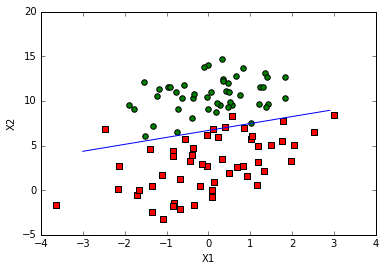

In [57]:
plotBestFit(weights.getA())

#### 5.2.4 Train: stochastic gradient ascent

##### Pseudocode for the stochastic gradient ascent algorithm
- Start with the weight all set to 1
- For each piece of data in the dataSet:
    - Calculate the gradient of one piece of data
    - Update the weights vector by alpha*gradient
    - Return the weights vector

In [46]:
def stocGradAscent0(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

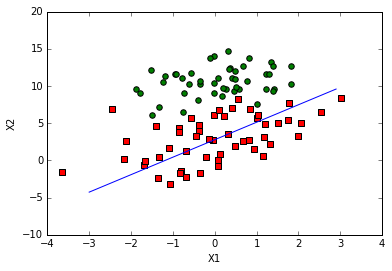

In [58]:
dataArr, labelMat = loadDataSet()
weights = stocGradAscent0(array(dataArr), labelMat)
#print weights
plotBestFit(weights)

In [60]:
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = shape(dataMatrix)
    weights = ones(n)
    for j in range(numIter):
        dataIndex = range(m)
        for i in range(m):
            alpha = 4 / (1.0 + j + i) + 0.01  # Alpha cahnges with each iteration
            randIndex = int(random.uniform(0, len(dataIndex)))  # Update vectors are randomly selected
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

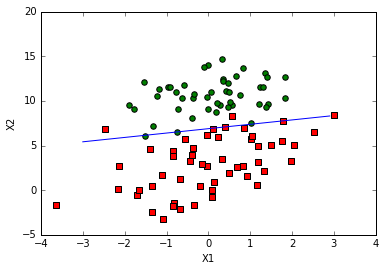

In [63]:
dataArr,labelMat=loadDataSet()
weights=stocGradAscent1(array(dataArr),labelMat)
plotBestFit(weights)

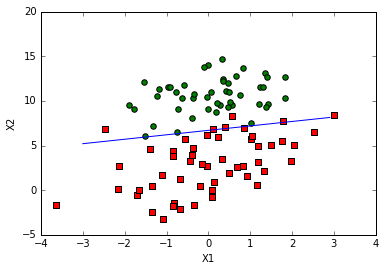

In [64]:
dataArr,labelMat=loadDataSet()
weights=stocGradAscent1(array(dataArr),labelMat, 500)
plotBestFit(weights)

### 5.3 Example: estimating horse fatalities from colic

#### 5.3.1 Prepare: dealing with missing values in the data
- http://archive.ics.uci.edu/ml/datasets/Horse+Colic

#### 5.3.2 Test: classifying with logistic regression

In [65]:
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0

def colicTest():
    frTrain = open('data/horseColicTraining.txt')
    frTest = open('data/horseColicTest.txt')
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(array(trainingSet), trainingLabels, 500)
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr), trainWeights))!=int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    print "the error rate of this test is: %f" % errorRate
    return errorRate

def multiTest():
    numTests = 10; errorSum=0.0
    for k in range(numTests):
        errorSum += colicTest()
    print "after %d iterations the average error rate is: %f" % (numTests, errorSum/float(numTests))

In [66]:
multiTest()

the error rate of this test is: 0.447761
the error rate of this test is: 0.417910
the error rate of this test is: 0.343284
the error rate of this test is: 0.313433
the error rate of this test is: 0.388060
the error rate of this test is: 0.268657
the error rate of this test is: 0.447761
the error rate of this test is: 0.388060
the error rate of this test is: 0.343284
the error rate of this test is: 0.268657
after 10 iterations the average error rate is: 0.362687


D:\ProgramFiles\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: overflow encountered in exp
